In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair
import time
import random
import re 
# For SSL work
import sys
import os
import os.path
import ssl
import stat
import subprocess
import urllib.request
import ssl
import io


# For SSL certification?
import certifi

# Data Manipulation/Wrangling/Cleaning
from dfply import *
import re
import missingno
from datetime import datetime
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from matplotlib.dates import date2num

# Graphing
from dfply import *
from plotnine import *
import seaborn as sns
from pandas.plotting import scatter_matrix

# For scraping
import requests # For downloading the website
from bs4 import BeautifulSoup # For parsing the website

In [11]:
# {!sys.executable} 
# !{sys.executable} -m pip install certifi


In [3]:
url = "https://covidtracking.com/data"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [4]:
for link in soup.find_all(class_ = "b84b7"):
    print(link.get_text())

View all of AL's racial data
View all of AK's racial data
View all of AZ's racial data
View all of AR's racial data
View all of CA's racial data
View all of CO's racial data
View all of CT's racial data
View all of DE's racial data
View all of DC's racial data
View all of FL's racial data
View all of GA's racial data
View all of GU's racial data
View all of HI's racial data
View all of ID's racial data
View all of IL's racial data
View all of IN's racial data
View all of IA's racial data
View all of KS's racial data
View all of KY's racial data
View all of LA's racial data
View all of ME's racial data
View all of MD's racial data
View all of MA's racial data
View all of MI's racial data
View all of MN's racial data
View all of MS's racial data
View all of MO's racial data
View all of MT's racial data
View all of NE's racial data
View all of NV's racial data
View all of NH's racial data
View all of NJ's racial data
View all of NM's racial data
View all of NY's racial data
View all of NC

Use the class: b84b7 to grab "View all of \<state\>'s racial data!

In [17]:
def main():
    openssl_dir, openssl_cafile = os.path.split(
        ssl.get_default_verify_paths().openssl_cafile)
    print(" -- pip install --upgrade certifi")
    subprocess.check_call([sys.executable,
        "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])
#     import certifi
    # change working directory to the default SSL directory
    os.chdir(openssl_dir)
    relpath_to_certifi_cafile = os.path.relpath(certifi.where())
    print(" -- removing any existing file or link")
    try:
        os.remove(openssl_cafile)
    except FileNotFoundError:
        pass
    print(" -- creating symlink to certifi certificate bundle")
    os.symlink(relpath_to_certifi_cafile, openssl_cafile)
    print(" -- setting permissions")
    os.chmod(openssl_cafile, STAT_0o775)
    print(" -- update complete")
if __name__ == '__main__':
    main()

 -- pip install --upgrade certifi


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Program Files\\Common Files\\SSL'

In [36]:
def getCovidRaceData(raceLink):
    '''
    Downloads racial Covid data from the given link.
    Usually downloads racial Covid data by US states.
    
    @param raceLink the webpage link
    @return the racial Covid dataframe
    '''
    racePage = requests.get(raceLink)
        
    raceSoup = BeautifulSoup(racePage.content, "html.parser")
    raceData = pd.DataFrame()
    for raceDownload in raceSoup.find_all("a", href = True):
        raceDownloadLink = re.search(r"/data/download/.+-race-ethnicity-historical\.csv", raceDownload.get("href"))

        if raceDownloadLink is not None:
            raceDownloadLink = "https://covidtracking.com/" + raceDownloadLink.string
            print(raceDownloadLink)
            
            raceData = getDF(raceDownloadLink)

    time.sleep(random.uniform(.5,3))
    return raceData
    
def getDF(raceDownloadLink):
    '''
    Given a downloadable link, opens the URL,
    decodes the response, and converts to the dataframe
    
    @param String raceDownloadLink the given link that will download dataframe/csv file
    @return the dataframe
    '''
    ssl._create_default_https_context = ssl._create_unverified_context
            # Grab response
    response = urllib.request.urlopen(raceDownloadLink)
    # decode response
    data = response.read().decode('utf-8')
    # convert to df!
    raceData = pd.read_csv(io.StringIO(data))
    
    return raceData

# def getRaceEthnicLink(link):
#     '''
#     Gets the link to the race-ethnic webpage.
#     (This webpage has a downloadable CSV)
    
#     @param
#     '''
#     raceEthnicLink = re.search(r"/data/state/.+/race-ethnicity", link)
    
#     if raceEthnicLink is not None:
#         raceEthnicLink = raceEthnicLink.string
#         raceEthnicLink = "https://covidtracking.com" + raceEthnicLink
#     return raceEthnicLink
    



In [37]:
url = "https://covidtracking.com/data"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")    
fullCovid = pd.DataFrame()


for link in soup.find_all('a', href = True):
#     myLink = link.get("href")
    link = link.get("href")
    raceEthnicLink = re.search(r"/data/state/.+/race-ethnicity", link)

    if raceEthnicLink is not None:
        raceEthnicLink = raceEthnicLink.string
#         print(raceEthnicLink)
        raceEthnicLink = "https://covidtracking.com" + raceEthnicLink
        
        raceData = getCovidRaceData(raceEthnicLink)
        fullCovid = pd.concat([fullCovid, raceData], axis = 0)
#         print("fullCovid shape:", fullCovid.shape)
        
        
#         print(page.text[0])
#     print(link.get('href'))
fullCovid.head()

https://covidtracking.com//data/download/alabama-race-ethnicity-historical.csv
https://covidtracking.com//data/download/alaska-race-ethnicity-historical.csv
https://covidtracking.com//data/download/arizona-race-ethnicity-historical.csv
https://covidtracking.com//data/download/arkansas-race-ethnicity-historical.csv
https://covidtracking.com//data/download/california-race-ethnicity-historical.csv
https://covidtracking.com//data/download/colorado-race-ethnicity-historical.csv
https://covidtracking.com//data/download/connecticut-race-ethnicity-historical.csv
https://covidtracking.com//data/download/delaware-race-ethnicity-historical.csv
https://covidtracking.com//data/download/district-of-columbia-race-ethnicity-historical.csv
https://covidtracking.com//data/download/florida-race-ethnicity-historical.csv
https://covidtracking.com//data/download/georgia-race-ethnicity-historical.csv
https://covidtracking.com//data/download/guam-race-ethnicity-historical.csv
https://covidtracking.com//data/d

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NHPI,Cases_Multiracial,Cases_LatinX,...,Tests_Black,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown,Tests_LatinX,Tests_Multiracial,Tests_NHPI,Tests_Other,Tests_White,Tests_Total
0,AL,20210307,2273.0,NaN,82790.0,160347.0,38000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,20210303,2248.0,NaN,82171.0,159154.0,37912.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,20210228,2237.0,NaN,81782.0,158420.0,37809.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,20210224,2224.0,NaN,81137.0,157043.0,37660.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,20210221,2172.0,NaN,79834.0,154388.0,37418.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# raceDownloadLink = "https://covidtracking.com//data/download/alabama-race-ethnicity-historical.csv"
# pd.read_csv(raceDownloadLink, encoding = "utf-8")
fullCovid

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NHPI,Cases_Multiracial,Cases_LatinX,...,Tests_Black,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown,Tests_LatinX,Tests_Multiracial,Tests_NHPI,Tests_Other,Tests_White,Tests_Total
0,AL,20210307,2273.0,NaN,82790.0,160347.0,38000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,20210303,2248.0,NaN,82171.0,159154.0,37912.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,20210228,2237.0,NaN,81782.0,158420.0,37809.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,20210224,2224.0,NaN,81137.0,157043.0,37660.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,20210221,2172.0,NaN,79834.0,154388.0,37418.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,WY,20200426,5.0,64.0,4.0,217.0,12.0,NaN,NaN,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,WY,20200422,3.0,40.0,3.0,210.0,10.0,NaN,NaN,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,WY,20200419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,WY,20200415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Reset index so index actually equals to the row numbers
fullCovid = fullCovid.reset_index(drop = True)

In [42]:
fullCovid.to_csv("fullCovid.csv", index = False)

In [2]:
fullCovid = pd.read_csv("fullCovid.csv")

<AxesSubplot:>

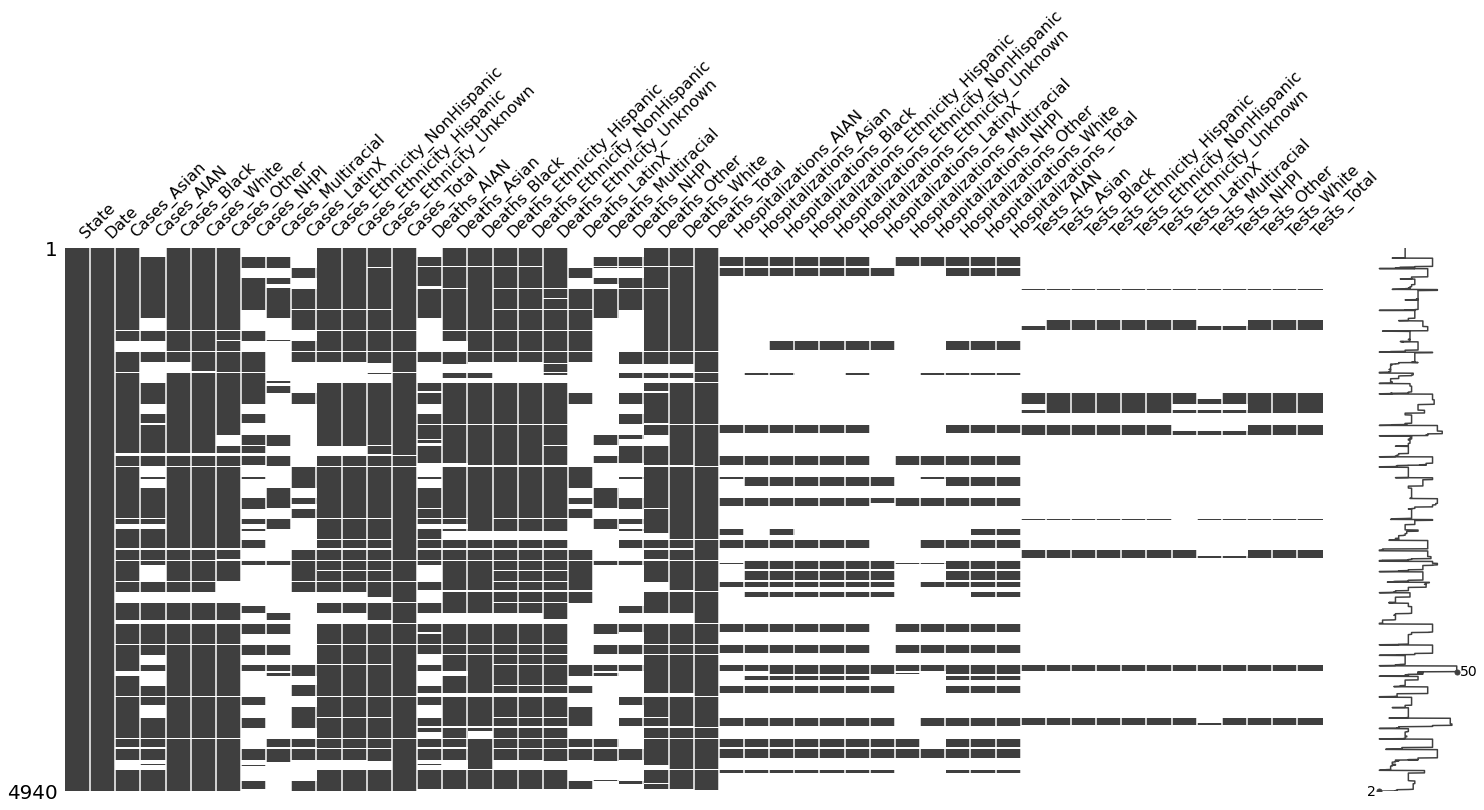

In [3]:
missingno.matrix(fullCovid)

Yikes. I see a lot of NAs for the hospitalization columns.

In [45]:
# fullCovid.columns[]
# fullCovid.iloc[:, fullCovid[fullCovid.isna().sum()/fullCovid.shape[0] < 0.5]]

# Columns where they have less than 50% of them are NAs
fullCovid.columns[fullCovid.isna().sum()/fullCovid.shape[0] < 0.5]
fullCovid[ fullCovid.columns[fullCovid.isna().sum()/fullCovid.shape[0] < 0.5]]

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Hispanic,Cases_Ethnicity_Unknown,Cases_Total,Deaths_AIAN,Deaths_Asian,Deaths_Black,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown,Deaths_Other,Deaths_White,Deaths_Total
0,AL,20210307,2273.0,NaN,82790.0,160347.0,38000.0,167064.0,12312.0,320443.0,499819.0,NaN,24.0,2223.0,137.0,6083.0,3928.0,300.0,4730.0,10148.0
1,AL,20210303,2248.0,NaN,82171.0,159154.0,37912.0,165460.0,12245.0,319449.0,497154.0,NaN,24.0,2193.0,135.0,6002.0,3892.0,298.0,4674.0,10029.0
2,AL,20210228,2237.0,NaN,81782.0,158420.0,37809.0,164533.0,12206.0,316513.0,493252.0,NaN,24.0,2168.0,134.0,5938.0,3857.0,294.0,4625.0,9929.0
3,AL,20210224,2224.0,NaN,81137.0,157043.0,37660.0,162952.0,12129.0,315139.0,490220.0,NaN,23.0,2134.0,130.0,5835.0,3779.0,287.0,4531.0,9744.0
4,AL,20210221,2172.0,NaN,79834.0,154388.0,37418.0,159737.0,12010.0,315096.0,486843.0,NaN,22.0,2044.0,130.0,5589.0,3873.0,277.0,4343.0,9592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,WY,20200426,5.0,64.0,4.0,217.0,12.0,302.0,54.0,14.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4936,WY,20200422,3.0,40.0,3.0,210.0,10.0,NaN,NaN,NaN,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4937,WY,20200419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,WY,20200415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(fullCovid.shape)
# fullCovid.State.unique()

(4940, 50)


There are about 4900 rows and 50 columns.

In [5]:
# fullCovidCorrectDate
# datetime.strptime(fullCovid.Date, '%y/%m/%d')
# fullCovid.Date
# Grabbing The correct date
fullCovidCorrectDate = fullCovid.copy()

# Eradicating columns who have at least 50% NAs
fullCovidCorrectDate = fullCovidCorrectDate[fullCovidCorrectDate.columns[fullCovidCorrectDate.isna().sum()/fullCovidCorrectDate.shape[0] < 0.5]]
fullCovidCorrectDate.Date = fullCovidCorrectDate.Date.apply(lambda row: datetime.strptime(str(row), '%Y%m%d').date())

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: SomeBlackCases
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 98 rows containing missing values.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 98 rows containing missing values.


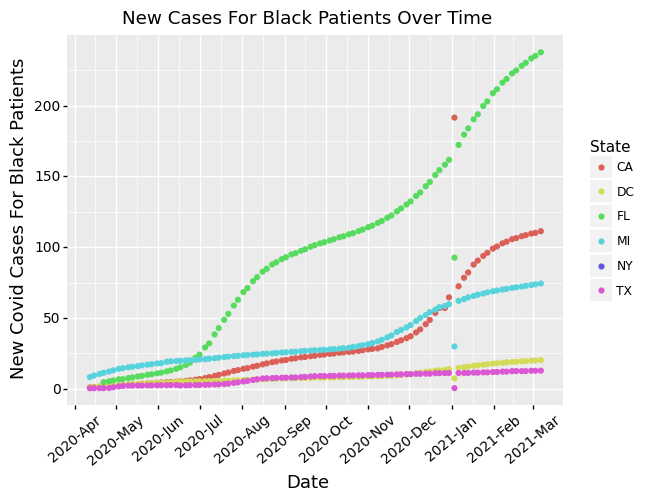

<ggplot: (122465276889)>


In [6]:
# Help: https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-manipulating-date-breaks-and-date-labels.html
p = (
    fullCovidCorrectDate >>
    mask((X.State == "MI") |
         (X.State == "CA") |
         (X.State == "DC") |
         (X.State == "NY") |
         (X.State == "FL") |
         (X.State == "TX")
        ) >> 
    mutate(casesByThousand = X.Cases_Black/1000) >>
#     mask(X.Date > datetime.strptime(str(20201203), "%Y%m%d").date()) >>
    ggplot(aes(x = "Date", y = "casesByThousand",
               color = "State"
              )) +
    geom_point() +
    theme(axis_text_x= element_text(rotation = 40)) +
    scale_x_datetime(breaks=date_breaks('1 month'), 
                     # How do you want the date labels to look like
                     labels = date_format('%Y-%b'),) +  
#     geom_vline(xintercept= datetime.strptime(str(20210101), "%Y%m%d").date(),
#                 linetype=4, colour="black") +
#     geom_vline(xintercept = date2num(datetime.strptime(str(20210101), "%Y%m%d").date())) +
#     scale_x_datetime(aesthetics= ['x', 'xintercept'], labels=date_format("%H:%M")) +
    labs(
      x = "Date",
      y='New Covid Cases For Black Patients',
      title = "New Cases For Black Patients Over Time"
  ) +
    theme(axis_text = element_text(color = "black", size = 10)) +
    theme(axis_title = element_text(color = "black", size = 13))
)
ggsave(plot = p, filename = "SomeBlackCases")
print(p)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 190 rows containing missing values.


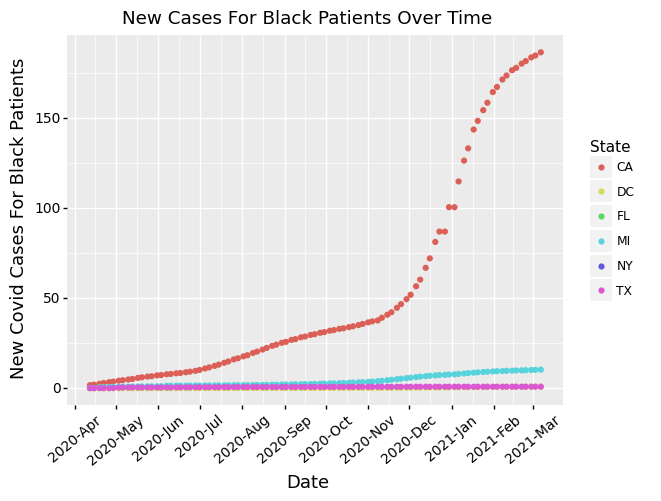

<ggplot: (171243708055)>


In [9]:
# Help: https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-manipulating-date-breaks-and-date-labels.html
p = (
    fullCovidCorrectDate >>
    mask((X.State == "MI") |
         (X.State == "CA") |
         (X.State == "DC") |
         (X.State == "NY") |
         (X.State == "FL") |
         (X.State == "TX")
        ) >> 
    mutate(casesByThousand = X.Cases_Asian/1000) >>
#     mask(X.Date > datetime.strptime(str(20201203), "%Y%m%d").date()) >>
    ggplot(aes(x = "Date", y = "casesByThousand",
               color = "State"
              )) +
    geom_point() +
    theme(axis_text_x= element_text(rotation = 40)) +
    scale_x_datetime(breaks=date_breaks('1 month'), 
                     # How do you want the date labels to look like
                     labels = date_format('%Y-%b'),) +  
#     geom_vline(xintercept= datetime.strptime(str(20210101), "%Y%m%d").date(),
#                 linetype=4, colour="black") +
#     geom_vline(xintercept = date2num(datetime.strptime(str(20210101), "%Y%m%d").date())) +
#     scale_x_datetime(aesthetics= ['x', 'xintercept'], labels=date_format("%H:%M")) +
    labs(
      x = "Date",
      y='New Covid Cases For Black Patients',
      title = "New Cases For Black Patients Over Time"
  ) +
    theme(axis_text = element_text(color = "black", size = 10)) +
    theme(axis_title = element_text(color = "black", size = 13))
)
# ggsave(plot = p, filename = "SomeBlackCases")
print(p)

<AxesSubplot:>

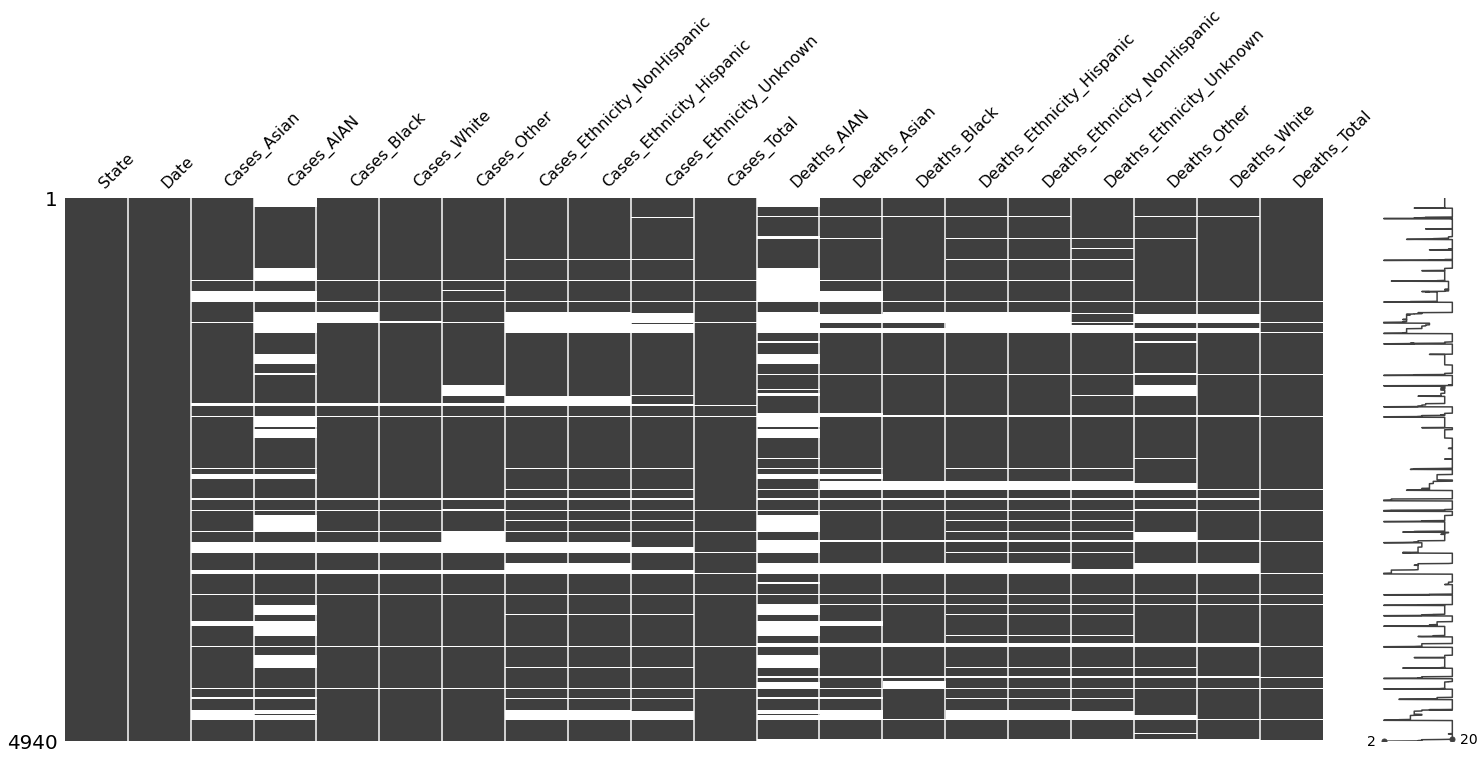

In [50]:
missingno.matrix(fullCovidCorrectDate)

After eradicating columns who had at least 50% NAs, we have a small subset of columns (mainly deaths and cases).

## Descriptive Stats

In [51]:
fullCovidCorrectDate.describe().round(2)

,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Hispanic,Cases_Ethnicity_Unknown,Cases_Total,Deaths_AIAN,Deaths_Asian,Deaths_Black,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown,Deaths_Other,Deaths_White,Deaths_Total
count,4370.00,3263.00,4587.00,4668.00,4472.00,4211.00,4211.00,4410.00,4827.00,2851.00,4099.00,4345.00,4195.00,4200.00,4373.00,4181.00,4501.00,4780.00
mean,4089.76,2365.15,19757.07,70432.57,11525.72,95620.93,36969.78,87621.59,200769.53,62.23,174.99,854.27,883.58,3671.19,449.07,159.02,2458.42,4462.73
std,12037.24,5420.42,31794.02,105548.60,25639.92,141972.99,109876.53,218861.12,352675.83,155.66,487.53,1342.72,2415.43,4886.07,827.55,364.05,3218.01,7059.80
min,0.00,0.00,1.00,6.00,0.00,44.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,-1.00,0.00,2.00,0.00
25%,393.00,143.00,1249.50,6292.50,518.25,11720.00,3362.00,4401.50,17960.00,4.00,9.00,41.00,45.00,539.75,26.00,8.00,319.00,464.00
50%,1311.50,524.00,6376.00,26498.50,3135.50,39389.00,11809.00,23644.50,76522.00,13.00,30.00,245.00,125.00,1670.50,112.00,33.00,1170.00,1703.50
75%,3863.75,1737.00,23769.00,83005.75,10981.50,116668.00,31245.50,82260.50,233908.00,45.00,118.50,1149.00,422.50,4936.00,445.00,110.00,3352.00,5303.50
max,186562.00,41839.00,237772.00,664121.00,307324.00,1216078.00,1509103.00,2619476.00,3501394.00,1361.00,6105.00,9812.00,24402.00,32664.00,6066.00,2834.00,19497.00,54124.00


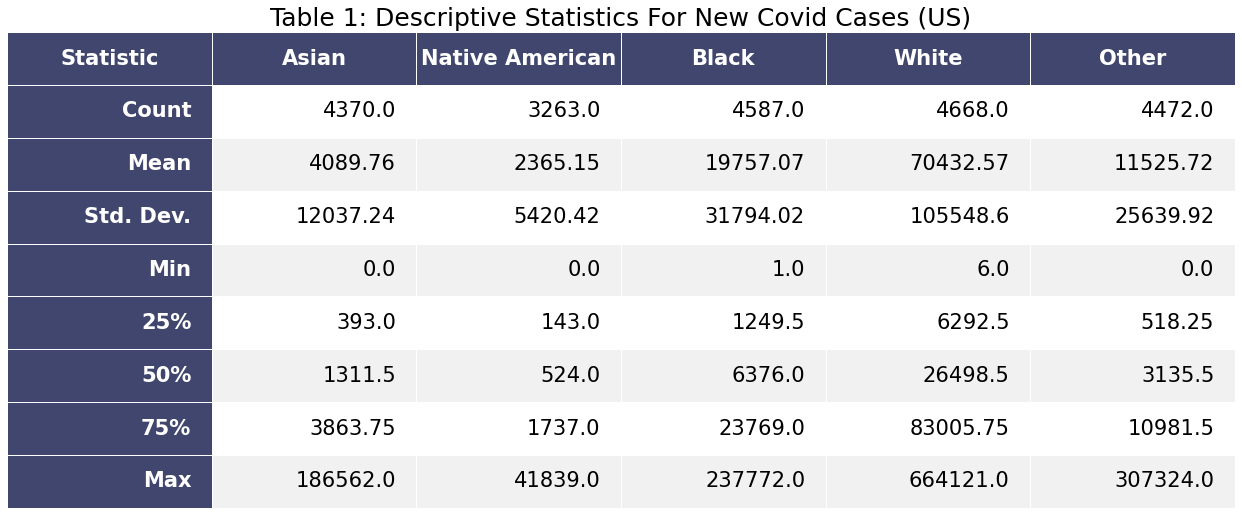

In [7]:
def render_mpl_table(data, col_width=2.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + 5 + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
#     print(mpl_table)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

# Creating a descriptive summary statistics
p = fullCovidCorrectDate.rename(
    # Renaming the columns to be more standard English
    columns = 
   {"Cases_Asian" : "Asian",
   "Cases_AIAN" : "Native American",
   "Cases_Black" : "Black",
    "Cases_White" : "White",
    "Cases_Other" : "Other"
   } 
)[["Asian", "Native American", 
           "Black", "White", "Other"]].describe().round(2)

# Adding a column for "Statistic"
p = (
    p >>
    mutate(Statistic = ["Count", "Mean", "Std. Dev.", "Min", "25%", "50%", "75%", "Max"]) >>
    select(X.Statistic, "Asian", "Native American", 
           "Black", "White", "Other")
)

fig,ax = render_mpl_table(p, header_columns=1, col_width=2.0, font_size = 21)
plt.title("Table 1: Descriptive Statistics For New Covid Cases (US)", fontsize = 25)
fig.savefig("Descriptive_Case_Stats.png", bbox_inches = "tight")

#### Graphing Covid Cases By Race

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: meanCaseByRace


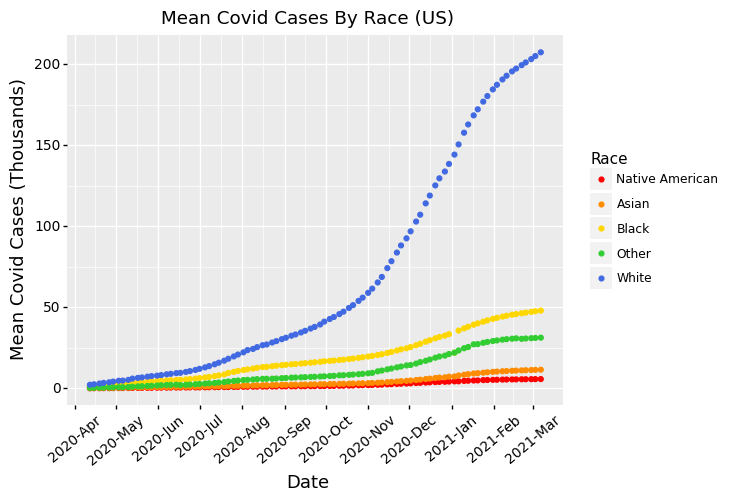

<ggplot: (122503857863)>


In [8]:
def plotCaseByCol(filter_col, title, xName, yName, df = fullCovidCorrectDate):
    '''
    Plots cases according to the filter columns you input
    
    @param filter_col the columns you want to include
    @ df the dataframe; fullCovidCorrectDate by default
    @return the plot
    '''
    #     p = pd.melt()
    if df is None:
        df = fullCovidCorrectDate

    p = pd.melt(df[filter_col], id_vars = ["Date", "State"])
    p = (
        p >>
        group_by(X.variable, X.Date) >>
    #     mask(X.variable.startswith("Cases_A")) >>
    #     mask(X.variable) >>
        summarize(meanValue = (X.value.mean())) >>
        mutate(meanValueByThousand = X.meanValue/1000) >>
        ggplot(aes(x = "Date", y = "meanValueByThousand", color = "variable")) +
        geom_point() +
        theme(axis_text_x= element_text(rotation = 40)) +
        scale_x_datetime(breaks=date_breaks('1 month'), 
                         # How do you want the date labels to look like
                         labels = date_format('%Y-%b')) +  
        scale_color_manual(
            labels = ["Native American", "Asian", "Black", "Other", "White"],
            values = ["red", "darkorange", "gold", "limegreen", "royalblue"]
        ) +
        labs(
            x = xName,
            y = yName,
            title = title,
            color = "Race"
        ) +
        theme(axis_text = element_text(color = "black", size = 10)) +
        theme(axis_title = element_text(color = "black", size = 13))
    )
    return p
filter_col = [col for col in fullCovidCorrectDate 
              if (col.startswith('Cases') or col == "Date" or col == "State") 
              and "Ethnicity" not in col
              and "Total" not in col
             ]
p = plotCaseByCol(filter_col, title = "Mean Covid Cases By Race (US)",
                 xName = "Date", yName = "Mean Covid Cases (Thousands)")
ggsave(plot = p, filename = "meanCaseByRace")
print(p)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: meanDeathByRace


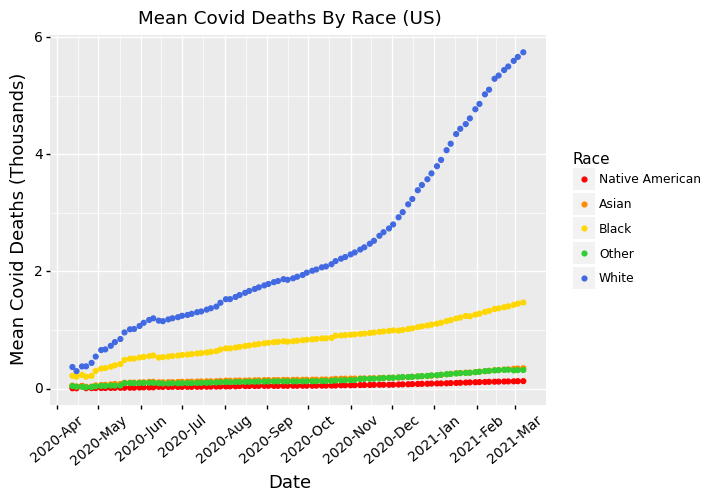

<ggplot: (122506966926)>


In [9]:
filter_col = [col for col in fullCovidCorrectDate 
              if (col.startswith('Deaths') or col == "Date" or col == "State") 
              and "Ethnicity" not in col
              and "Total" not in col
             ]
p = plotCaseByCol(filter_col, title = "Mean Covid Deaths By Race (US)",
                 xName = "Date", yName = "Mean Covid Deaths (Thousands)")
ggsave(plot = p, filename = "meanDeathByRace")
print(p)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_bin : Removed 4723 rows containing non-finite values.


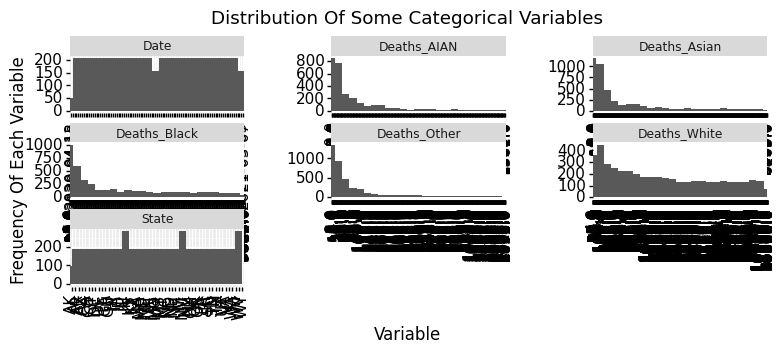

<ggplot: (122503799131)>


In [10]:
filter_col = [col for col in fullCovidCorrectDate 
              if (col.startswith('Deaths') or col == "Date" or col == "State") 
              and "Ethnicity" not in col
              and "Total" not in col
             ]

d = fullCovidCorrectDate[filter_col].melt()
p = (
    d >>
    mask((X.variable != "State") | (X.variable != "Date") ) >>
#     mutate_if(X.variable == "GENDER", "gender")>>
#     mutate(gender if X.variable == )
    ggplot(aes(x = "value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free', labeller= "label_value") +
    labs(
        x = "Variable",
        y = "Frequency Of Each Variable",
        title = "Distribution Of Some Categorical Variables"
    ) +
    theme(figure_size=(9,3),
          subplots_adjust={'wspace':0.5,
                             "hspace": 0.5}) +
    theme(axis_text_x = element_text(angle = 90),
         axis_text = element_text(size = 11, color = "black"),
         axis_title = element_text(size = 12, color = "black"))
)
print(p)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 12 x 5 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Distribution_Cases


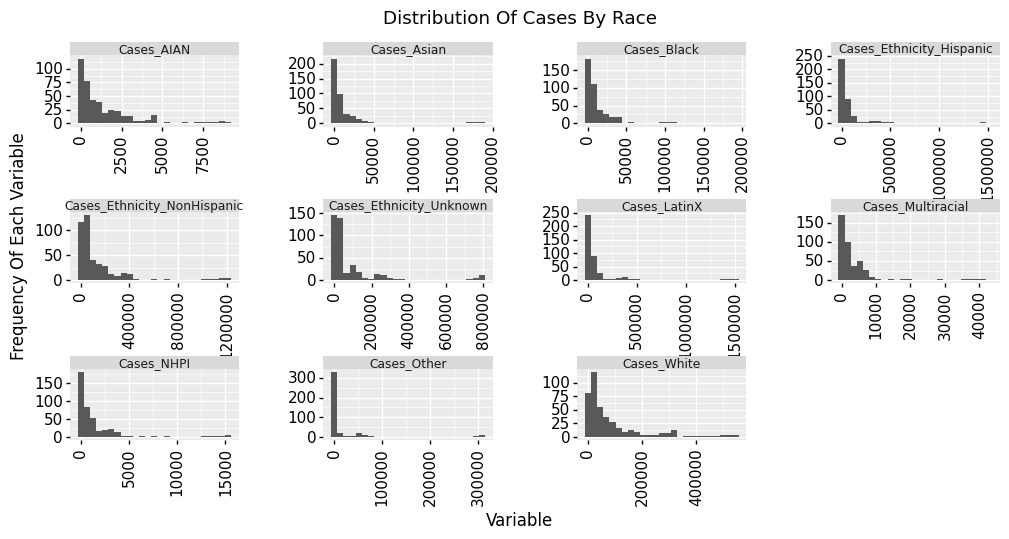

<ggplot: (122508899681)>


In [11]:
filter_col = [col for col in fullCovid 
              if (col.startswith('Cases') or col == "Date" or col == "State") 
              and "Date" not in col
              and "State" not in col
              and "Total" not in col
#               and "Ethnicity" not in col
             ]
d = fullCovid[filter_col].dropna().melt()
# selecting three numerical features
# features = ['Cases_Asian', 'Cases_Black',
#             'Cases_LatinX']
   
# # plotting the scatter matrix
# # with the features
# scatter_matrix(fullCovid[features])
# plt.show()
p = (
    d >>
#     mask((X.variable == "Cases_Asian") | (X.variable != "Date") ) >>
#     mutate_if(X.variable == "GENDER", "gender")>>
#     mutate(gender if X.variable == )
    ggplot(aes(x = "value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free', labeller= "label_value") +
    labs(
        x = "Variable",
        y = "Frequency Of Each Variable",
        title = "Distribution Of Cases By Race"
    ) +
    theme(figure_size=(12, 5),
          subplots_adjust={'wspace':0.5,
                             "hspace": 1.2}) +
    theme(axis_text_x = element_text(angle = 90),
         axis_text = element_text(size = 11, color = "black"),
         axis_title = element_text(size = 12, color = "black"))
)
ggsave(plot = p, filename = "Distribution_Cases")
print(p)

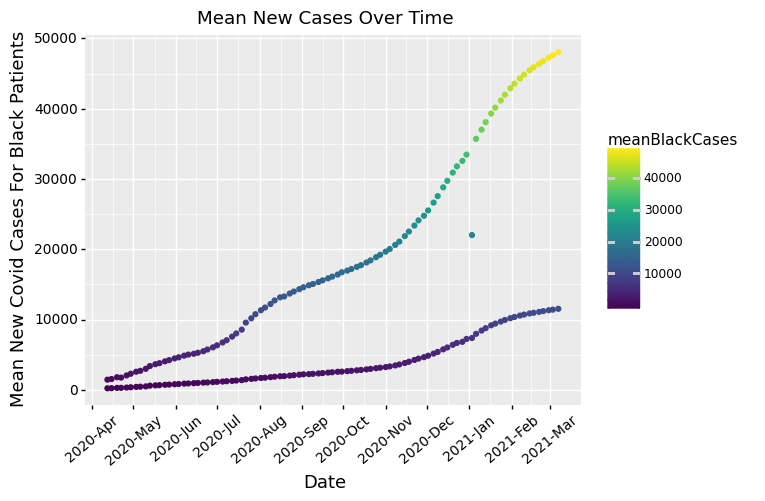

<ggplot: (183553037038)>

In [57]:
# Help: https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-manipulating-date-breaks-and-date-labels.html
# cols <- c("LINE1"="#f04546","LINE2"="#3591d1","BAR"="#62c76b")

(
    fullCovidCorrectDate >>
    group_by(X.Date) >>
    summarize(meanBlackCases = mean(X.Cases_Black),
              meanAsianCases = mean(X.Cases_Asian),
              meanWhiteCases = mean(X.Cases_White),
              meanNACases = mean(X.Cases_AIAN),
              meanOtherCases = mean(X.Cases_Other),
             ) >>
#     mask(X.State == "MI") >> 
#     mask(X.Date > datetime.strptime(str(20201203), "%Y%m%d").date()) >>
    ggplot(aes(x = "Date",
#                color = "State",
              )) +
    geom_point(aes(y = "meanBlackCases", color = "meanBlackCases")) +
    geom_point(aes(y = "meanAsianCases", color = "meanAsianCases")) +
#     geom_point(aes(y = "meanWhiteCases"), color = "yellow") +
#     geom_point(aes(y = "meanNACases"), color = "green") +
#     geom_point(aes(y = "meanOtherCases"), color = "blue") +
#     scale_color_manual(values = ["red", "orange", "yellow", "green", "blue"],
#                       labels = ["Black", "Asian", "White", "Native American", "Other"]) +
    theme(axis_text_x= element_text(rotation = 40)) +
    scale_x_datetime(breaks=date_breaks('1 month'), 
                     # How do you want the date labels to look like
                     labels = date_format('%Y-%b')) +  
#     scale_y_continuous(labels = comma) +
    labs(
      x = "Date",
      y= 'Mean New Covid Cases For Black Patients',
      title = "Mean New Cases Over Time"
  ) +
    theme(axis_text = element_text(color = "black", size = 10)) +
    theme(axis_title = element_text(color = "black", size = 13))
)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Compare_Cases_Race


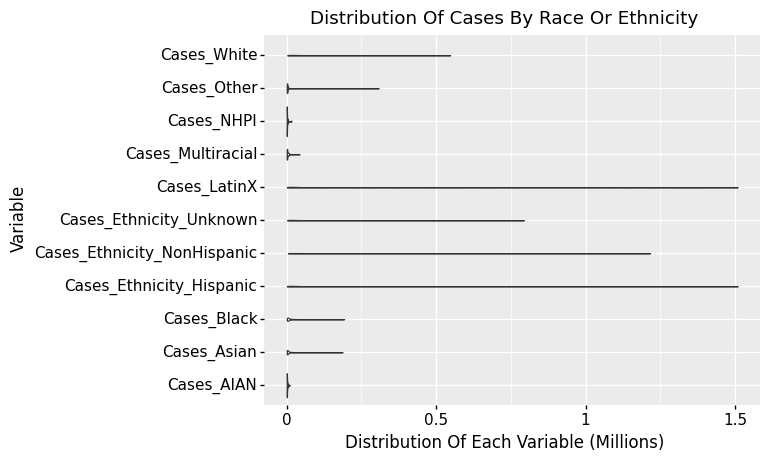

<ggplot: (183582795117)>


In [77]:
filter_col = [col for col in fullCovid 
              if (col.startswith('Cases') or col == "Date" or col == "State") 
              and "Date" not in col
              and "State" not in col
              and "Total" not in col
#               and "Ethnicity" not in col
             ]
d = fullCovid[filter_col].dropna().melt()
d = (d >>
    #     mask((X.variable == "Cases_Ethnicity_Hispanic")) >>
    #     mutate_if(X.variable == "GENDER", "gender")>>
    mutate(valueByMill = X.value/1000000))
d = d.sort_values(by="valueByMill", ascending=False).reset_index(drop=True)

p = (
    d >>
#     arrange(X.valueByMill, ascending = False) >>
    ggplot(aes(x = "variable", y = "valueByMill")) +
    geom_violin() +
#     facet_wrap("variable",scales='free', labeller= "label_value") +
    labs(
        x = "Variable",
        y = "Distribution Of Each Variable (Millions)",
        title = "Distribution Of Cases By Race Or Ethnicity"
    ) +
#     theme(figure_size=(12, 5),
#           subplots_adjust={'wspace':0.5,
#                              "hspace": 1.2}) +
    theme(
#         axis_text_x = element_text(angle = 90),
         axis_text = element_text(size = 11, color = "black"),
         axis_title = element_text(size = 12, color = "black")) +
    coord_flip()
)

# p = (
#     fullCovidCorrectDate >>
#     ggplot(aes(x = )) +
# )
ggsave(plot = p, filename = "Compare_Cases_Race")
print(p)

In [51]:
(fullCovidCorrectDate >>
    mutate(deathRate = X.Deaths_Asian/X.Cases_Asian) >>
 select(X.State, X.Date, X.Cases_Asian, X.Deaths_Asian, X.deathRate)>>
 mask(~X.deathRate.isna()) >>
 mask((X.State == "CA") | (X.State == "NY") | (X.State == "FL") | (X.State == "WY") |
        (X.State == "NV"))
)
    

,State,Date,Cases_Asian,Deaths_Asian,deathRate
380,CA,2021-03-07,186562.0,6105.0,0.032724
381,CA,2021-03-03,184765.0,5958.0,0.032246
382,CA,2021-02-28,183711.0,5875.0,0.031980
383,CA,2021-02-24,181664.0,5590.0,0.030771
384,CA,2021-02-21,180258.0,5504.0,0.030534
...,...,...,...,...,...
4917,WY,2020-06-28,6.0,0.0,0.000000
4918,WY,2020-06-24,7.0,0.0,0.000000
4919,WY,2020-06-21,4.0,0.0,0.000000
4920,WY,2020-06-17,5.0,0.0,0.000000


It appears that Hispanic (ethnicity) and LatinX (race) people suffered the highest number of new Covid cases. Whites pale in comparison.

Black


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Death_Rate_Black


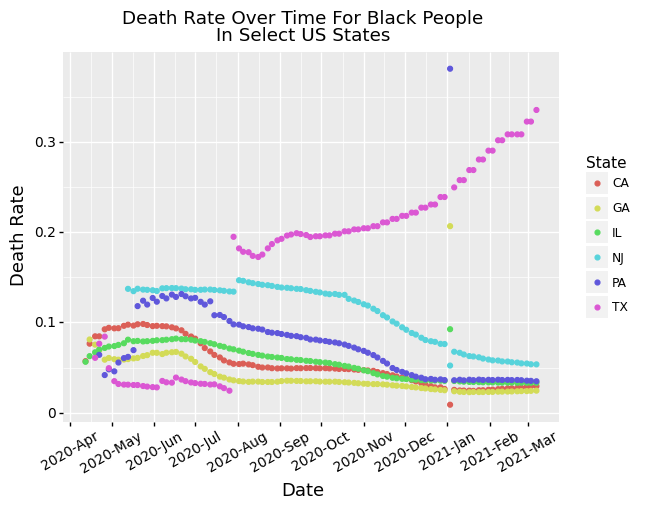

<ggplot: (122524629110)>

In [40]:
def deathRateByRace(race, saveAsPNG = False):
    '''
    Plots the death rate by race
    
    @param race the race you want to graph on death rate
    @param boolean saveAsPNG if True, saves the graph as a png image
    '''
    if not race[0].isupper():
        race = race.capitalize()
#     print(race)
    cases = "Cases_" + race
    deaths = "Deaths_" + race
    mydf = fullCovidCorrectDate.copy()
    mydf["deathRate"] = mydf[deaths]/mydf[cases]
    p = (
        mydf >>
        select(X.State, X.Date, contains(race), X.deathRate) >>
        group_by(X.State) >>
        mask((X.State == "CA") | (X.State == "PA") | (X.State == "IL") | (X.State == "GA") |
             (X.State == "TX") | (X.State == "NJ") |(X.State == "NY")) >>
        mask(X.deathRate <= 1.1) >>
        ggplot(aes(x = "Date", y = "deathRate", color = "State")) +
        geom_point() +
        theme(axis_text_x= element_text(rotation = 30)) +
        scale_x_datetime(breaks=date_breaks('1 month'), 
                     # How do you want the date labels to look like
                     labels = date_format('%Y-%b')) +  
#     scale_y_continuous(labels = comma) +
        labs(
          x = "Date",
          y= 'Death Rate',
          title = f"Death Rate Over Time For {race} People\nIn Select US States"  
        ) +
        theme(axis_text = element_text(color = "black", size = 10)) +
        theme(axis_title = element_text(color = "black", size = 13))
        
    )
    
    if (saveAsPNG):
        ggsave(plot = p, filename = "Death_Rate_" + race)
#     print(p)
    return p
deathRateByRace("black", saveAsPNG = True)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Death_Rate_Asian


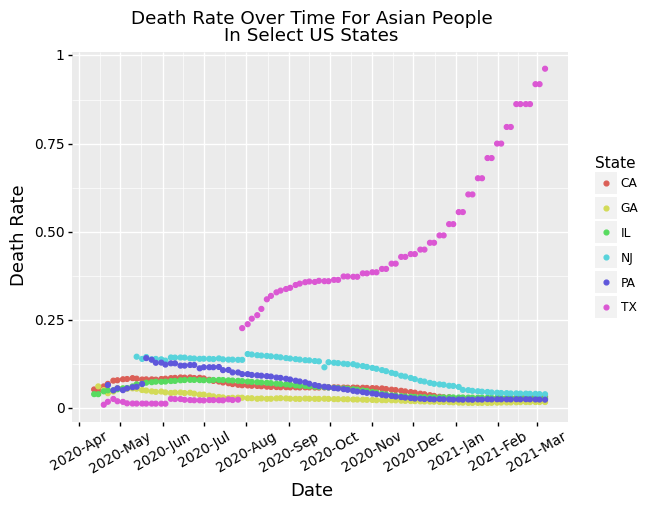

<ggplot: (122508955748)>

In [31]:
deathRateByRace("asian", saveAsPNG = True)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Death_Rate_White


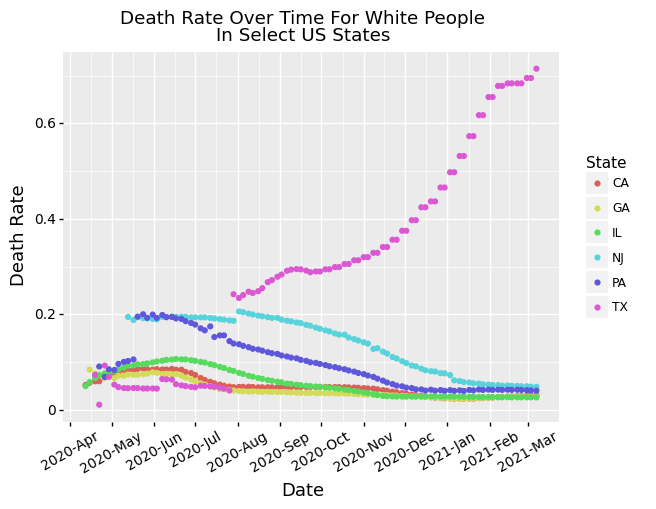

<ggplot: (171252666549)>

In [223]:
deathRateByRace("white", saveAsPNG = True)

In [19]:
# Scratch paper
# race = "Asian"
# cases = "Cases_" + race
# deaths = "Deaths_" + race
# mydf = fullCovidCorrectDate.copy()
# mydf["deathRate"] = mydf[deaths]/mydf[cases]

# (
#     mydf >>
#         select(X.State, X.Date, contains(race), X.deathRate)
# #     select(everything())

# )    
#     mutate(myDeathRate = select(contains("Cases")) + select(contains("Deaths")))
#     select(columns_between(cases, deaths, inclusive = False), columns_from(-1)) >>
    
#     mutate(deathRate = starts_with("Cases_") + starts_with("Deaths_")) 
#     mutate(deathRate = X.Deaths_Asian/X.Cases_Asian)

#     mask(~X.deathRate.isna()) >>
#     group_by(X.State) >>
#     mask((X.State == "CA") | (X.State == "PN") | (X.State == "OH") | (X.State == "GE") |
#          (X.State == "TX") | (X.State == "MA")) 

fullCovidCorrectDate.columns

Index(['State', 'Date', 'Cases_Asian', 'Cases_AIAN', 'Cases_Black',
       'Cases_White', 'Cases_Other', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_Unknown', 'Cases_Total',
       'Deaths_AIAN', 'Deaths_Asian', 'Deaths_Black',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'Deaths_Other', 'Deaths_White',
       'Deaths_Total'],
      dtype='object')

Other


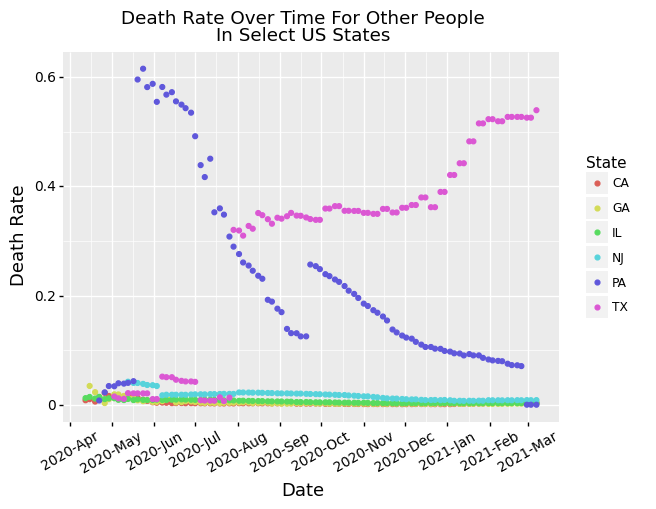

<ggplot: (122503800622)>

In [42]:
deathRateByRace("other", saveAsPNG = False)

AIAN


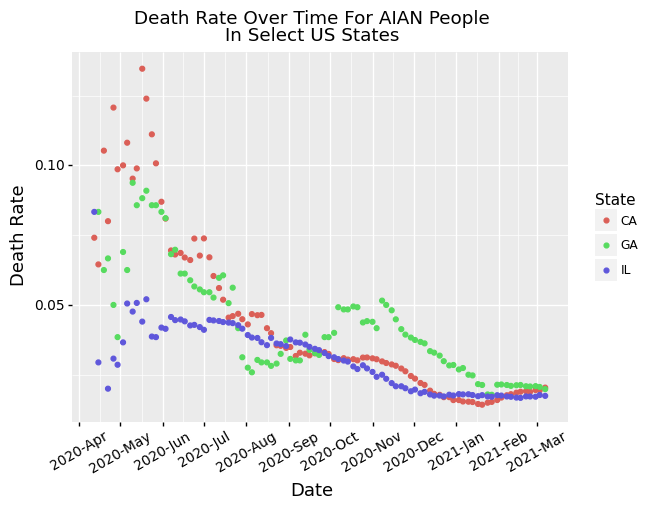

<ggplot: (122503800793)>

In [41]:
# race = "AIAN"
# print(race) if race[0].isupper()
    
deathRateByRace("AIAN", saveAsPNG = False)

In [211]:
# Scratch paper
(fullCovidCorrectDate >>
    mutate(deathRateAsian = X.Deaths_Asian/X.Cases_Asian) >>
    mutate(deathRateBlack = X.Deaths_Black/X.Cases_Black) >>
#     select(X.State, X.Date, X.Cases_Asian, X.Deaths_Asian, X.deathRateAsian) >>
#     mask(~X.deathRateAsian.isna()) >>
    mask((X.deathRateAsian < 1.1) & (X.deathRateAsian < 1.1))  >>
 select(X.State, X.Date, X.deathRateAsian, X.deathRateBlack)
)

,State,Date,deathRateAsian,deathRateBlack
0,AL,2021-03-07,0.010559,0.026851
1,AL,2021-03-03,0.010676,0.026688
2,AL,2021-02-28,0.010729,0.026510
3,AL,2021-02-24,0.010342,0.026301
4,AL,2021-02-21,0.010129,0.025603
...,...,...,...,...
4917,WY,2020-06-28,0.000000,0.000000
4918,WY,2020-06-24,0.000000,0.000000
4919,WY,2020-06-21,0.000000,0.000000
4920,WY,2020-06-17,0.000000,0.000000


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


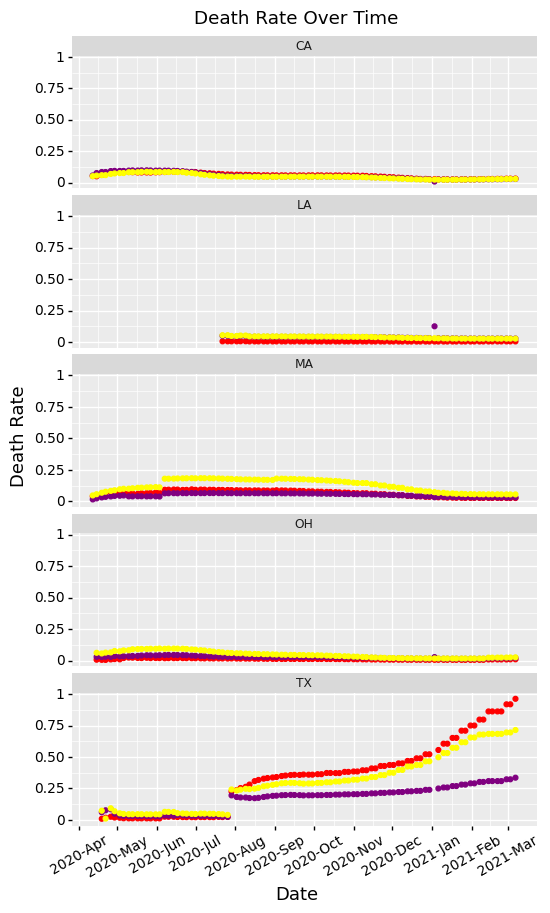

<ggplot: (122524599089)>


In [43]:
# Scratch WOrk
# statesList = ["CA", "NY", "WY"]

# p = (
#     fullCovidCorrectDate >>
#     mutate(deathRateAsian = X.Deaths_Asian/X.Cases_Asian,
#           deathRateBlack = X.Deaths_Black/X.Cases_Black,
#            deathRateWhite = X.Deaths_White/X.Cases_White,
#           ) >>
# #     select(X.State, X.Date, X.Cases_Asian, X.Deaths_Asian, X.deathRateAsian) >>
# #     mask(~X.deathRateAsian.isna()) >>
#     mask((X.deathRateAsian < 1.1) & (X.deathRateBlack < 1.1) & (X.deathRateWhite < 1.1)) >>
    
#     group_by(X.State) >>
#     mask((X.State == "CA") | (X.State == "PN") | (X.State == "OH") | (X.State == "GE") |
#          (X.State == "TX") | (X.State == "MA") | (X.State == "LA")) >> 
# #     filter_by(X.State in statesList) >>
#     ggplot() +
# #     geom_line() +
#     geom_point(aes(x = "Date", y = "deathRateAsian"), color = "red") +
#     geom_point(aes(x = "Date", y = "deathRateBlack"), color = "purple") +
#     geom_point(aes(x = "Date", y = "deathRateWhite"), color = "yellow") +
#     facet_wrap("State", ncol = 1) +
#     theme(axis_text_x= element_text(rotation = 30)) +
#     scale_x_datetime(breaks=date_breaks('1 month'), 
#                      # How do you want the date labels to look like
#                      labels = date_format('%Y-%b')) +  
# #     scale_y_continuous(labels = comma) +
#     scale_color_manual(["red", "purple", "yellow"]) +
#     theme(figure_size=(6, 10),
#           subplots_adjust={'wspace':0,
#                              "hspace": 0.2}) +
#     labs(
#       x = "Date",
#       y= 'Death Rate',
#       title = "Death Rate Over Time"
#   ) +
#     theme(axis_text = element_text(color = "black", size = 10)) +
#     theme(axis_title = element_text(color = "black", size = 13))
# )
# # ggsave(plot = p, filename = "Asian_Death_Rate")
# print(p)

# Trying To Convert To Long Format

In [190]:
fullCovidCorrectDate.columns

Index(['State', 'Date', 'Cases_Asian', 'Cases_AIAN', 'Cases_Black',
       'Cases_White', 'Cases_Other', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_Unknown', 'Cases_Total',
       'Deaths_AIAN', 'Deaths_Asian', 'Deaths_Black',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'Deaths_Other', 'Deaths_White',
       'Deaths_Total'],
      dtype='object')

In [109]:
fullCovidLong = fullCovidCorrectDate.copy()

fullCovidLong=pd.melt(fullCovidLong, id_vars=["State", "Date"],
                      var_name='metric', value_name='value')
fullCovidLong.head()


,State,Date,metric,value
0,AL,2021-03-07,Cases_Asian,2273.0
1,AL,2021-03-03,Cases_Asian,2248.0
2,AL,2021-02-28,Cases_Asian,2237.0
3,AL,2021-02-24,Cases_Asian,2224.0
4,AL,2021-02-21,Cases_Asian,2172.0


In [95]:
# Scratch
txt = "Cases_Asian_Other"
x = re.search(r"_(.+)$", txt)
print(x.group(1))

Asian_Other


In [145]:
# fullCovidLong["Race"] = fullCovidLong["metric"].apply(lambda row: (row.split("_")[1:]))
# fullCovidLong["Cases"] = fullCovidLong["metric"].apply(lambda row: )
# fullCovidLong.head()
fullCovidRace = fullCovidLong.copy()
fullCovidRace["Race"] = fullCovidLong["metric"].apply(lambda row: re.search(r"\_(.+)$", row).group(1))
fullCovidRace["metric"] = fullCovidLong["metric"].apply(lambda row: re.search(r"([^_]+)", row).group(1))
fullCovidRace = fullCovidRace.pivot( index= ["State", "Date", "Race"], columns='metric', values='value').reset_index()


In [146]:
fullCovidRace

metric,State,Date,Race,Cases,Deaths
0,AK,2020-04-12,AIAN,NaN,NaN
1,AK,2020-04-12,Asian,NaN,NaN
2,AK,2020-04-12,Black,NaN,NaN
3,AK,2020-04-12,Ethnicity_Hispanic,NaN,NaN
4,AK,2020-04-12,Ethnicity_NonHispanic,NaN,NaN
...,...,...,...,...,...
44455,WY,2021-03-07,Ethnicity_NonHispanic,32933.0,613.0
44456,WY,2021-03-07,Ethnicity_Unknown,21292.0,11.0
44457,WY,2021-03-07,Other,1726.0,8.0
44458,WY,2021-03-07,Total,54764.0,682.0


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 13 x 6 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Death_Rate_Race


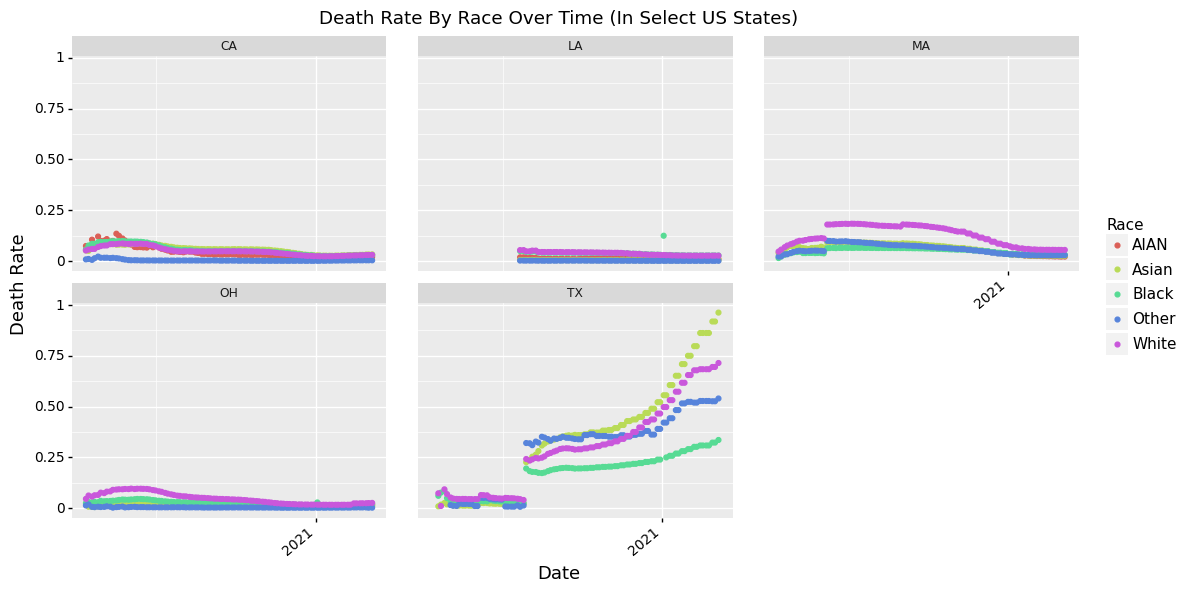

<ggplot: (122529526646)>


In [216]:
p = (
    fullCovidRace >>
    group_by(X.State, X.Race) >>
    mutate(
        deathRate = X.Deaths/X.Cases
    ) >>
    mask(~X.deathRate.isna()) >> 
    mask(X.deathRate < 1.1) >>
    mask((X.State == "CA") | (X.State == "PN") | (X.State == "OH") | (X.State == "GE") |
         (X.State == "TX") | (X.State == "MA") | (X.State == "LA") | (X.State == "NY")) >>
    mask((X.Race == "Asian") | (X.Race == "White") | (X.Race == "Black") |
         (X.Race == "Other") | (X.Race == "AIAN")
        ) >>
    ggplot(aes(x = "Date", y = "deathRate", color = "Race")) +
    geom_point() +
#     geom_line() +
    facet_wrap("State", ncol = 3) +
    theme(axis_text_x= 
          element_text(rotation = 40, hjust = 1)
#           element_text()
         ) +
    scale_x_datetime(breaks=date_breaks("1 year"), 
                     # How do you want the date labels to look like
#                      labels = date_format('\'%y-%b')
                     labels = date_format("%Y")
                    ) +  
    theme(figure_size=(13, 6),
          subplots_adjust={'wspace':0.1,
                             "hspace": 0.15}) +
    theme(axis_text = element_text(color = "black", size = 10)) +
    theme(axis_title = element_text(color = "black", size = 13)) +
    theme(legend_text = element_text(color = "black", size = 11)) +
    labs(
        x = "Date",
        y = "Death Rate",
        title = "Death Rate By Race Over Time (In Select US States)"
    )
    
)
ggsave(plot = p, filename = "Death_Rate_Race")
print(p)

In [128]:
fullCovidRace['idx'] = fullCovidRace.groupby('State').cumcount()+1
fullCovidRace = fullCovidRace.pivot_table(index=['State', 'Date', "Race"], columns='idx', 
                    values=['metric', 'value'], aggfunc='first')

fullCovidRace = fullCovidRace.sort_index(axis=1, level=1)
fullCovidRace.head()
# pd.pivot(fullCovidRace, index= ["State", "Date", "Race"], columns='metric', values='value')

# df.columns = [f'{x}_{y}' for x,y in df.columns]
# df = df.reset_index()

metric value metric value metric value  \
idx                                      1     1      2     2      3     3      
State Date       Race                                                           
AK    2020-04-12 AIAN                     NaN   NaN    NaN   NaN    NaN   NaN   
                 Asian                    NaN   NaN    NaN   NaN    NaN   NaN   
                 Black                    NaN   NaN    NaN   NaN    NaN   NaN   
                 Ethnicity_Hispanic       NaN   NaN    NaN   NaN    NaN   NaN   
                 Ethnicity_NonHispanic    NaN   NaN    NaN   NaN    NaN   NaN   

                                       metric value metric value  ... metric  \
idx                                      4     4      5     5     ...   1706   
State Date       Race                                             ...          
AK    2020-04-12 AIAN                     NaN   NaN    NaN   NaN  ...    NaN   
                 Asian                    NaN   NaN    NaN   NaN  ...    NaN   
                 Black                    NaN   NaN    NaN   NaN  ...    NaN   
                 Ethnicity_Hispanic       NaN   NaN    NaN   NaN  ...    NaN   
                 Ethnicity_NonHispanic    NaN   NaN    NaN   NaN  ...    NaN   

                                       value metric value metric value metric  \
idx                                     1706   1707  1707   1708  1708   1709   
State Date       Race                                                           
AK    2020-04-12 AIAN                    NaN    NaN   NaN    NaN   NaN    NaN   
                 Asian                   NaN    NaN   NaN    NaN   NaN    NaN   
                 Black                   NaN    NaN   NaN    NaN   NaN    NaN   
                 Ethnicity_Hispanic      NaN    NaN   NaN    NaN   NaN    NaN   
                 Ethnicity_NonHispanic   NaN    NaN   NaN    NaN   NaN    NaN   

                                       value metric value  
idx                                     1709   1710  1710  
State Date       Race                                      
AK    2020-04-12 AIAN                    NaN    NaN   NaN  
                 Asian                   NaN    NaN   NaN  
                 Black                   NaN    NaN   NaN  
                 Ethnicity_Hispanic      NaN    NaN   NaN  
                 Ethnicity_NonHispanic   NaN    NaN   NaN  

[5 rows x 3420 columns]

In [12]:
covid = pd.read_csv("Covid_Data_County.csv")
covid.head()

,fips,state,county,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,white_rate,...,asian_rate,known_pct,pop_white,pop_black,pop_hispanic,pct_white,pct_black,pct_hispanic,pct_asian,pct_native
0,1001,Alabama,Autauga County,119,44,21,0,0,0,11,...,0,54.621849,41316,10755,1649,0.743080,0.193432,0.029658,0.012824,0.004370
1,1003,Alabama,Baldwin County,201,144,6,0,0,0,8,...,0,74.626866,181201,19151,10131,0.831113,0.087840,0.046468,0.011852,0.006701
2,1005,Alabama,Barbour County,91,5,32,0,0,0,4,...,0,40.659341,11356,11951,1064,0.456413,0.480326,0.042764,0.005627,0.003416
3,1007,Alabama,Bibb County,50,17,5,0,0,0,10,...,0,44.000000,16708,4731,588,0.745893,0.211205,0.026250,0.002589,0.003839
4,1009,Alabama,Blount County,37,15,0,0,0,0,3,...,0,40.540541,50255,846,5536,0.868862,0.014627,0.095712,0.003147,0.005152


In [13]:
print(covid.shape)
covid.state.unique()

(974, 23)


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware',
       'Florida', 'Georgia', 'Idaho', 'Illinois', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Montana', 'New Jersey', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania',
       'South Carolina', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
covid.dtypes

fips                int64
state              object
county             object
cases               int64
white_cases         int64
black_cases         int64
hispanic_cases      int64
native_cases        int64
asian_cases         int64
white_rate          int64
black_rate          int64
hispanic_rate       int64
native_rate         int64
asian_rate          int64
known_pct         float64
pop_white           int64
pop_black           int64
pop_hispanic        int64
pct_white         float64
pct_black         float64
pct_hispanic      float64
pct_asian         float64
pct_native        float64
dtype: object

In [15]:
print(covid.shape)

(974, 23)


974 rows, 23 columns.

In [16]:
covid.dtypes

fips                int64
state              object
county             object
cases               int64
white_cases         int64
black_cases         int64
hispanic_cases      int64
native_cases        int64
asian_cases         int64
white_rate          int64
black_rate          int64
hispanic_rate       int64
native_rate         int64
asian_rate          int64
known_pct         float64
pop_white           int64
pop_black           int64
pop_hispanic        int64
pct_white         float64
pct_black         float64
pct_hispanic      float64
pct_asian         float64
pct_native        float64
dtype: object

In [17]:
covid.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware',
       'Florida', 'Georgia', 'Idaho', 'Illinois', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Montana', 'New Jersey', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania',
       'South Carolina', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
(
    covid >>
    mask(X.state == "California")
)

,fips,state,county,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,white_rate,...,asian_rate,known_pct,pop_white,pop_black,pop_hispanic,pct_white,pct_black,pct_hispanic,pct_asian,pct_native


In [20]:
covidRace = pd.read_csv("Provisional_COVID-19_Deaths__Distribution_of_Deaths_by_Race_and_Hispanic_Origin.csv")
covidRace.head(10)

,Data as of,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino,Footnote
0,09/15/2021,01/01/2020,09/11/2021,2020/2021,NaN,By Total,United States,Count of COVID-19 deaths,403522.0,99522.0,7305.0,24037.0,1354.0,2232.0,118718.0,NaN
1,09/15/2021,01/01/2020,09/11/2021,2020/2021,NaN,By Total,United States,Distribution of COVID-19 deaths (%),61.3,15.1,1.1,3.6,0.2,0.3,18.0,NaN
2,09/15/2021,01/01/2020,09/11/2021,2020/2021,NaN,By Total,United States,Unweighted distribution of population (%),59.7,12.6,0.7,5.9,0.2,2.3,18.6,NaN
3,09/15/2021,01/01/2020,09/11/2021,2020/2021,NaN,By Total,United States,Weighted distribution of population (%),39.6,13.4,0.4,10.0,0.2,2.2,34.2,NaN
4,09/15/2021,01/01/2020,12/31/2020,2020,NaN,By Year,United States,Count of COVID-19 deaths,232738.0,61475.0,4616.0,13571.0,693.0,1142.0,69433.0,NaN
5,09/15/2021,01/01/2020,12/31/2020,2020,NaN,By Year,United States,Distribution of COVID-19 deaths (%),60.4,16.0,1.2,3.5,0.2,0.3,18.0,NaN
6,09/15/2021,01/01/2020,12/31/2020,2020,NaN,By Year,United States,Unweighted distribution of population (%),59.7,12.6,0.7,5.9,0.2,2.3,18.6,NaN
7,09/15/2021,01/01/2020,12/31/2020,2020,NaN,By Year,United States,Weighted distribution of population (%),40.5,14.2,0.4,9.9,0.2,2.1,32.8,NaN
8,09/15/2021,01/01/2021,09/11/2021,2021,NaN,By Year,United States,Count of COVID-19 deaths,170784.0,38047.0,2689.0,10466.0,661.0,1090.0,49285.0,NaN
9,09/15/2021,01/01/2021,09/11/2021,2021,NaN,By Year,United States,Distribution of COVID-19 deaths (%),62.4,13.9,1.0,3.8,0.2,0.4,18.0,NaN


In [21]:
print(covidRace.shape)

(5088, 16)


In [22]:
covidRace["Start Date"].unique()

array(['01/01/2020', '01/01/2021', '02/01/2020', '03/01/2020',
       '04/01/2020', '05/01/2020', '06/01/2020', '07/01/2020',
       '08/01/2020', '09/01/2020', '10/01/2020', '11/01/2020',
       '12/01/2020', '02/01/2021', '03/01/2021', '04/01/2021',
       '05/01/2021', '06/01/2021', '07/01/2021', '08/01/2021',
       '09/01/2021'], dtype=object)

In [23]:
# covidRace.Start-Date